# Predict gross revenue for IMDB popular movies

## Identify: Problem Statement & Goals

**(Note: initial notebook created by General Assembly, answers and code by acardocacho)**

You've been hired by Netflix to examine what factors lead to certain ratings for movies. Given that Netflix does not currently store this type of data, your boss has suggested that you collect ratings and reviews data from IMDB. Netflix is no stranger to machine learning, however:
Netflix uses random forests and decision trees to predict what types of movies an individual user may like.
Using unsupervised learning techniques, they are able to continually update suggestions, listings, and other features of it's user interface.
Netflix, however, hasn't focused on collecting data on the top movies of all time, and would like to add some of them to their offerings based on popularity and other factors.

Point: Your boss isn't sure where to start on this project, so your task is to collect the data and construct a random forest to understand what factors contribute to ratings.

Acquire data from IMDB, and use whatever metrics you can collect to predict whether it is a good movie.
When you've finished your analysis, Netflix would like a report detailing your findings, with recommendations as to next steps.

Problem statement:
What factors are the most direct predictors of gross revenue?
You can use rating as your target variable. But it's up to you whether to treat it as continuous, binary, or multiclass.

Goal: Completed Jupyter notebook that includes modeling using a random forest and a blog post explaining your findings.

## Acquire Data: Query IMDB, write results, scrape IMDB

Install IMDB client using the IMDB json web service made available for their iOS app.

Type this command in the Unix shell: <code>pip install imdbpie</code>

In [45]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
from imdbpie import Imdb
imdb = Imdb(anonymize=True)
result = imdb.top_250()
result_df = pd.DataFrame(result)
print(result_df.shape)
result_df.head()

(250, 8)


,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1729723,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1181979,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,810468,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1714830,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,461640,8.9,tt0050083,12 Angry Men,feature,1957


Using IMDB's API retrives very little information about each title.  I will use some of the solution code from week06 day1 lab1.4 to scrape more data.

The page http://www.imdb.com/chart/top contains the list of the top 250 movies of all times. Retrieve the page using the requests library and then parse the html to obtain a list of the `movie_ids` for these movies.

In [47]:
import json
import urllib
import requests
import json
import re

In [48]:
def get_top_250():
    response = requests.get('http://www.imdb.com/chart/top')
    html = response.text
    entries = re.findall("<a href.*?/title/(.*?)/", html)
    return list(set(entries))

In [49]:
entries = get_top_250()

In [50]:
len(entries)

250

In [51]:
entries[0]

u'tt2582802'

An open API for the Internet Movie Database exists at http://www.omdbapi.com.

Use this API to retrieve information about each of the 250 movies extracted in the previous step.
1. Check the documentation of omdbapi.com to learn how to request movie data by id.
- Define a function that returns a python object with all the information for a given id.
- Iterate on all the IDs and store the results in a list of such objects.
- Create a Pandas Dataframe from the list.

In [52]:
def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print(entry, res.status_code)
    else:
        print('.', end=' '),
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j

In [53]:
entries_dict_list = [get_entry(e) for e in entries]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [54]:
len(entries_dict_list)

250

In [55]:
df = pd.DataFrame(entries_dict_list)

In [56]:
df.head(3)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 132 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,A promising young drummer enrolls at a cut-thr...,https://images-na.ssl-images-amazon.com/images...,R,15 Oct 2014,True,107 min,Whiplash,movie,Damien Chazelle,2014,tt2582802,8.5,"421,684"
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,A poor village under attack by bandits recruit...,https://images-na.ssl-images-amazon.com/images...,UNRATED,19 Nov 1956,True,207 min,Seven Samurai,movie,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,8.7,"233,929"
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,Archaeologist and adventurer Indiana Jones is ...,https://images-na.ssl-images-amazon.com/images...,PG,12 Jun 1981,True,115 min,Raiders of the Lost Ark,movie,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,8.5,"671,034"


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        250 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      250 non-null object
Metascore     250 non-null object
Plot          250 non-null object
Poster        250 non-null object
Rated         250 non-null object
Released      250 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


### Get gross values per movie

The OMDB API is great, but it does not provide information about Gross Revenue of the movie. 

Revert back to scraping for this: write a function that retrieves the gross revenue from the entry page at imdb.com.
The function should handle the exception of when the page doesn't report gross revenue.
Retrieve the gross revenue for each movie and store it in a separate dataframe.

In [58]:
def get_gross(entry):
    response = requests.get('http://www.imdb.com/title/'+entry)
    html = response.text
    try:
        gross_list = re.findall("Gross:</h4>[ ]*\$([^ ]*)", html)
        gross = int(gross_list[0].replace(',', ''))
        print('.', end=' ')
        return gross
    except Exception as ex:
        print
        print(gross_list, ex, entry, response.status_code)
        return 0

In [59]:
grosses = [(e, get_gross(e)) for e in entries]

In [60]:
df_gross = pd.DataFrame(grosses, columns=['imdbID', 'Gross'])
df_gross.head()

,imdbID,Gross
0,tt2582802,13092000.0
1,tt0047478,269061.0
2,tt0082971,242374454.0
3,tt0050212,27200000.0
4,tt0986264,1204660.0


## Mine: Rename & describe data

### Data munging

1. Now that we have movie information and gross revenue information, let's clean the two datasets.
- Check if there are null values. Be careful they may appear to be valid strings.
- Convert the columns to the appropriate formats. In particular handle:
    - Released
    - Runtime
    - year
    - imdbRating
    - imdbVotes
- Merge the data from the two datasets into a single one

In [61]:
df = df.replace('N/A', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        246 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      249 non-null object
Metascore     163 non-null object
Plot          231 non-null object
Poster        249 non-null object
Rated         246 non-null object
Released      249 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


In [62]:
df.Released = pd.to_datetime(df.Released)

In [63]:
def intminutes(x):
    y = x.replace('min', '').strip()
    return int(y)

df.Runtime = df.Runtime.apply(intminutes)

In [64]:
df.Year = df.Year.astype(int)

In [65]:
df.imdbRating = df.imdbRating.astype(float)

In [66]:
def intvotes(x):
    y = x.replace(',', '').strip()
    return int(y)

df.imdbVotes = df.imdbVotes.apply(intvotes)

In [67]:
df = pd.merge(df, df_gross)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 21 columns):
Actors        250 non-null object
Awards        246 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      249 non-null object
Metascore     163 non-null object
Plot          231 non-null object
Poster        249 non-null object
Rated         246 non-null object
Released      249 non-null datetime64[ns]
Response      250 non-null object
Runtime       250 non-null int64
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null int64
imdbID        250 non-null object
imdbRating    250 non-null float64
imdbVotes     250 non-null int64
Gross         181 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(15)
memory usage: 43.0+ KB


In [69]:
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,...,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes,Gross
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 132 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,A promising young drummer enrolls at a cut-thr...,https://images-na.ssl-images-amazon.com/images...,R,...,True,107,Whiplash,movie,Damien Chazelle,2014,tt2582802,8.5,421684,13092000.0
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,A poor village under attack by bandits recruit...,https://images-na.ssl-images-amazon.com/images...,UNRATED,...,True,207,Seven Samurai,movie,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,8.7,233929,269061.0
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,Archaeologist and adventurer Indiana Jones is ...,https://images-na.ssl-images-amazon.com/images...,PG,...,True,115,Raiders of the Lost Ark,movie,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,8.5,671034,242374454.0
3,"William Holden, Alec Guinness, Jack Hawkins, S...",Won 7 Oscars. Another 23 wins & 7 nominations.,"UK, USA",David Lean,"Adventure, Drama, History","English, Japanese, Thai",NaN,After settling his differences with a Japanese...,https://images-na.ssl-images-amazon.com/images...,PG,...,True,161,The Bridge on the River Kwai,movie,"Pierre Boulle (novel), Carl Foreman (screenpla...",1957,tt0050212,8.2,152823,27200000.0
4,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",14 wins & 15 nominations.,India,"Aamir Khan, Amole Gupte","Drama, Family, Music","Hindi, English",NaN,An eight-year-old boy is thought to be lazy an...,https://images-na.ssl-images-amazon.com/images...,PG,...,True,165,Like Stars on Earth,movie,"Amole Gupte (dialogue & screenplay), Amole Gup...",2007,tt0986264,8.5,88167,1204660.0


### Text vectorization

There are several columns in the data that contain a comma separated list of items, for example the Genre column and the Actors column. Let's transform those to binary columns using the count vectorizer from scikit learn.

**Hint:** In order to get the actors name right, we have to modify the `token_pattern` in the `CountVectorizer`.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
cv = CountVectorizer()
data = cv.fit_transform(df.Genre).todense()
columns = ['genre_'+c for c in cv.get_feature_names()]
genredf = pd.DataFrame(data, columns=columns)
genredf.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,genre_fi,...,genre_music,genre_musical,genre_mystery,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(df.Actors).todense()
columns = ['actor: '+c for c in cv.get_feature_names()]
actorsdf = pd.DataFrame(data, columns=columns)
actorsdf.head()

,actor: aamir khan,actor: aaron eckhart,actor: abdel ahmed,actor: adam baldwin,actor: adam driver,actor: adolphe menjou,actor: adrien brody,actor: agnes moorehead,actor: ahney her,actor: akemi yamaguchi,...,actor: xolani mali,actor: yacef saadi,actor: yesim salkim,actor: yoshiko shinohara,actor: yukiko shimazaki,actor: yves montand,actor: yôko tsukasa,actor: zach grenier,actor: álvaro guerrero,actor: çetin tekindor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df.Actors[0]

u'Miles Teller, J.K. Simmons, Paul Reiser, Melissa Benoist'

In [75]:
actorsdf.loc[0,actorsdf.iloc[0] != 0]

actor: j.k. simmons       1
actor: melissa benoist    1
actor: miles teller       1
actor: paul reiser        1
Name: 0, dtype: int64

In [21]:
cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(df.Director).todense()
columns = ['director: '+c for c in cv.get_feature_names()]
directorsdf = pd.DataFrame(data, columns=columns)
directorsdf.head()

,director: aamir khan,director: adam elliot,director: akira kurosawa,director: alan mak,director: alejandro g,director: alfred hitchcock,director: amole gupte,director: andrei tarkovsky,director: andrew stanton,director: anurag kashyap,...,director: von donnersmarck,director: wes anderson,director: william wyler,director: wilson yip,director: wolfgang petersen,director: woody allen,director: wook park,director: yasujirô ozu,director: yavuz turgul,director: çagan irmak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# there is one movie from USA with no language
df["Language"].fillna("english", inplace=True)
# english and american are the same (for non-USA and non-UK countries)
df["Language"] = df["Language"].replace("american", "english")

cv = CountVectorizer()
data = cv.fit_transform(df.Language).todense()
columns = ['language_'+c for c in cv.get_feature_names()]
languagesdf = pd.DataFrame(data, columns=columns)
languagesdf.head()

,language_american,language_arabic,language_belarusian,language_cantonese,language_czech,language_danish,language_english,language_esperanto,language_french,language_gaelic,...,language_spanish,language_swahili,language_swedish,language_thai,language_turkish,language_urdu,language_vietnamese,language_xhosa,language_yiddish,language_zulu
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# some country names have multiple words
df["CountryNoSpaces"] = df["Country"].str.replace(" ", "")

cv = CountVectorizer()
data = cv.fit_transform(df.CountryNoSpaces).todense()
columns = ['country_'+c for c in cv.get_feature_names()]
countriesdf = pd.DataFrame(data, columns=columns)
countriesdf.head()

,country_algeria,country_argentina,country_australia,country_austria,country_belgium,country_brazil,country_canada,country_china,country_denmark,country_france,...,country_sovietunion,country_spain,country_sweden,country_switzerland,country_taiwan,country_turkey,country_uk,country_unitedarabemirates,country_usa,country_westgermany
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# save all data to files
df.to_csv("movies.csv", encoding="utf-8")
genredf.to_csv("genres.csv", encoding="utf-8")
actorsdf.to_csv("actors.csv", encoding="utf-8")
directorsdf.to_csv("directors.csv", encoding="utf-8")
languagesdf.to_csv("languages.csv", encoding="utf-8")
countriesdf.to_csv("countries.csv", encoding="utf-8")

### xxx Start loading from here, no need to scrape and clean everytime

In [1]:
import numpy as np
import pandas as pd 
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from __future__ import division, print_function, unicode_literals
%matplotlib inline
%load_ext sql

moviesdf = pd.read_csv('movies.csv')
moviesdf.drop(["Unnamed: 0"], axis=1, inplace=True)
print("================Movies")
print(moviesdf.info())

genredf = pd.read_csv('genres.csv')
genredf.drop(["Unnamed: 0"], axis=1, inplace=True)
print("================Genres")
print(genredf.info())

actorsdf = pd.read_csv('actors.csv')
actorsdf.drop(["Unnamed: 0"], axis=1, inplace=True)
print("================Actors")
print(actorsdf.info())

directorsdf = pd.read_csv('directors.csv')
directorsdf.drop(["Unnamed: 0"], axis=1, inplace=True)
print("================Directors")
print(directorsdf.info())

languagesdf = pd.read_csv('languages.csv')
languagesdf.drop(["Unnamed: 0"], axis=1, inplace=True)
print("================Languages")
print(languagesdf.info())

countriesdf = pd.read_csv('countries.csv')
countriesdf.drop(["Unnamed: 0"], axis=1, inplace=True)
print("================Countries")
print(countriesdf.info())

================Movies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
Actors             250 non-null object
Awards             246 non-null object
Country            250 non-null object
Director           250 non-null object
Genre              250 non-null object
Language           250 non-null object
Metascore          163 non-null float64
Plot               231 non-null object
Poster             249 non-null object
Rated              246 non-null object
Released           249 non-null object
Response           250 non-null bool
Runtime            250 non-null int64
Title              250 non-null object
Type               250 non-null object
Writer             250 non-null object
Year               250 non-null int64
imdbID             250 non-null object
imdbRating         250 non-null float64
imdbVotes          250 non-null int64
Gross              181 non-null float64
CountryNoSpaces    250 non-null object
dtypes: bool(1),

### Answering some questions:

1. What are the top 10 grossing movies?
- Who are the 10 actors that appear in the most movies?
- What's the average grossing of the movies in which each of these actors appear?
- What genre is the oldest movie?


In [2]:
# What are the top 10 grossing movies?
moviesdf[['Title', 'Gross', 'Genre']].sort_values('Gross', ascending = False).head(10)

,Title,Gross,Genre
162,Star Wars: The Force Awakens,936627416.0,"Action, Adventure, Fantasy"
37,The Dark Knight,533316061.0,"Action, Crime, Drama"
234,Star Wars: Episode IV - A New Hope,460935665.0,"Action, Adventure, Fantasy"
161,The Dark Knight Rises,448130642.0,"Action, Thriller"
48,The Lion King,422783777.0,"Animation, Adventure, Drama"
102,Toy Story 3,414984497.0,"Animation, Adventure, Comedy"
70,Harry Potter and the Deathly Hallows: Part 2,380955619.0,"Adventure, Drama, Fantasy"
9,Finding Nemo,380838870.0,"Animation, Adventure, Comedy"
81,The Lord of the Rings: The Return of the King,377019252.0,"Adventure, Drama, Fantasy"
94,Jurassic Park,356784000.0,"Adventure, Sci-Fi, Thriller"


In [3]:
#Who are the 17 actors that appear in the most movies?
topactors = actorsdf.sum().sort_values(ascending = False).head(17)
topactors

actor: leonardo dicaprio    7
actor: harrison ford        7
actor: robert de            7
actor: tom hanks            6
actor: tom hardy            5
actor: clint eastwood       5
actor: carrie fisher        4
actor: james stewart        4
actor: mark hamill          4
actor: matt damon           4
actor: joe pesci            4
actor: morgan freeman       4
actor: christian bale       4
actor: charles chaplin      4
actor: aamir khan           4
actor: brad pitt            4
actor: al pacino            4
dtype: int64

In [4]:
# What's the average grossing of the movies in which each of these actors appear?
means = [moviesdf.loc[actorsdf[actor]==1,'Gross'].mean() for actor in topactors.index]
means = pd.Series(means, index = topactors.index)
means.sort_values(ascending = False)

actor: mark hamill          4.992118e+08
actor: carrie fisher        4.992118e+08
actor: harrison ford        3.519134e+08
actor: christian bale       3.099683e+08
actor: tom hanks            2.423047e+08
actor: tom hardy            2.183233e+08
actor: matt damon           1.815702e+08
actor: leonardo dicaprio    1.686647e+08
actor: clint eastwood       8.894150e+07
actor: morgan freeman       8.251176e+07
actor: al pacino            7.606449e+07
actor: brad pitt            7.194123e+07
actor: robert de            3.655932e+07
actor: joe pesci            2.365499e+07
actor: james stewart        1.385000e+07
actor: aamir khan           3.308376e+06
actor: charles chaplin      1.331622e+06
dtype: float64

In [5]:
# What genre were the oldest movies?
moviesdf.sort_values('Released')[['Genre', 'Title', 'Released', 'Gross']].head()

,Genre,Title,Released,Gross
91,"Comedy, Drama, Family",The Kid,1921-02-06,2500000.0
181,"Action, Adventure, Comedy",The General,1927-02-24,NaN
211,"Drama, Sci-Fi",Metropolis,1927-03-13,26435.0
194,"Drama, Romance",Sunrise,1927-11-04,NaN
175,"Biography, Drama, History",The Passion of Joan of Arc,1928-10-25,NaN


## Refine: Visualize data

(Plots that describe your data and evaluate your model)

(Bonus: Use multiple data viz tools)

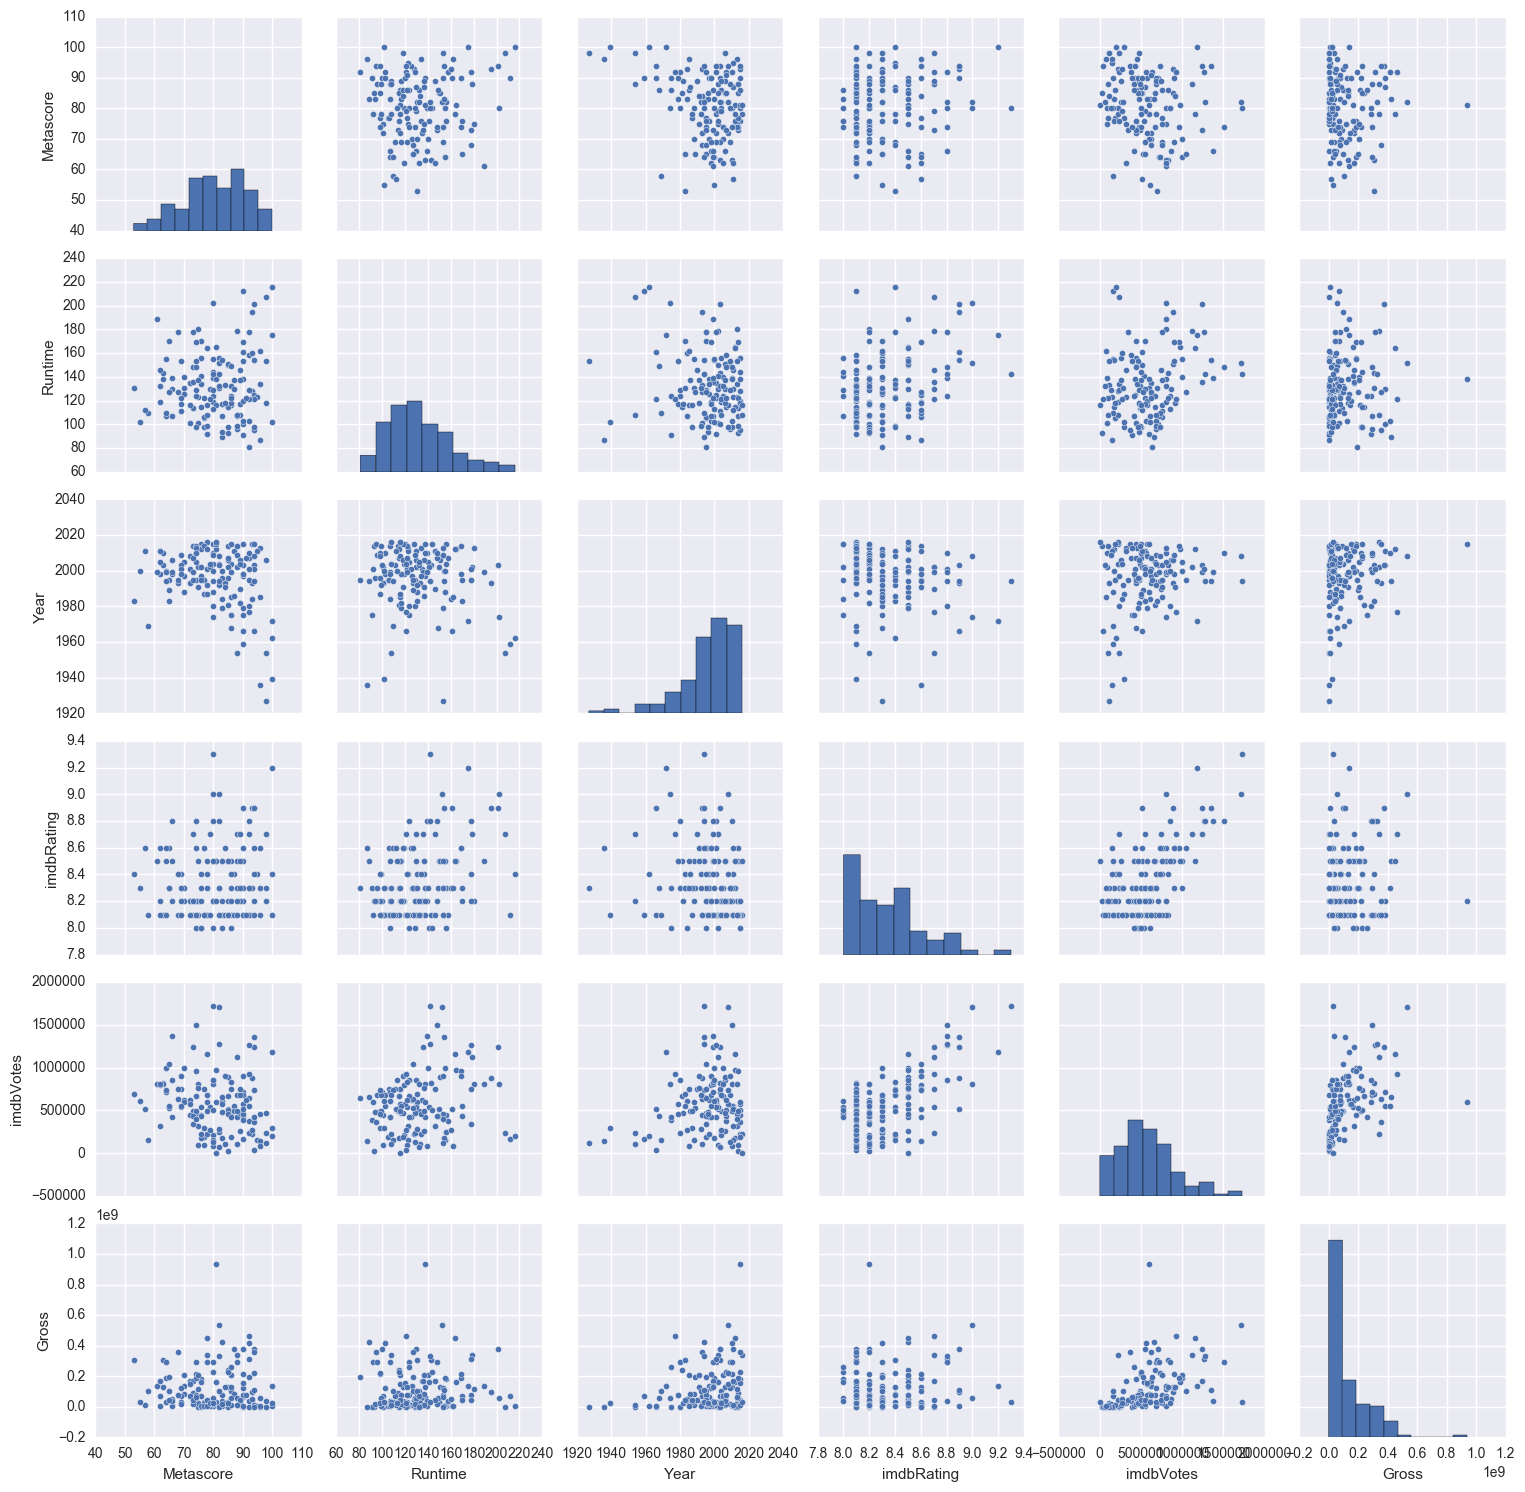

In [114]:
sns.pairplot(moviesdf.dropna(), vars=["Metascore", "Runtime", "Year", "imdbRating", "imdbVotes", "Gross"])

Regarding the 250 most popular movies, we can see that:
- the distribution of the year is negatively skewed, that is, there are more recent movies in this list.
- all ratings are above 8 (it makes sense that popular movies have high rates).
- gross income is positively skewed: the vast majority of movies have relatively low gross values compared to the very few highest grossing movies.
- more recent movies tend to have higher gross incomes, more votes and higher ratings.
- movies with higher ratings tend to also have more votes.
- movies with higher ratings / more votes tend to have higher gross values, but it's not a very clear trend.

We can also see these relations in the correlation following matrix.

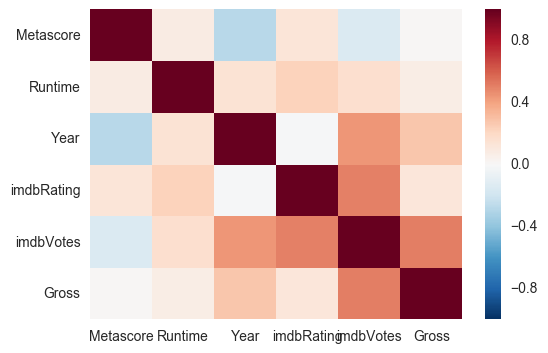

In [115]:
sns.heatmap(moviesdf.drop("Response", axis=1).corr())

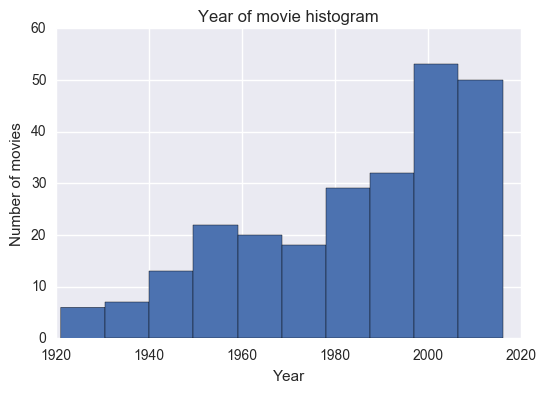

In [116]:
moviesdf["Year"].hist()
plt.title("Year of movie histogram")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.show()

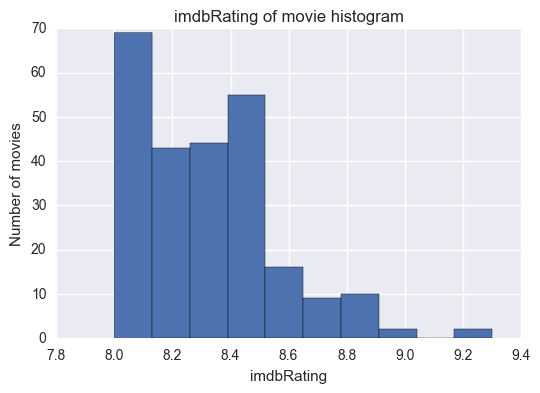

In [227]:
moviesdf["imdbRating"].hist()
plt.title("imdbRating of movie histogram")
plt.xlabel("imdbRating")
plt.ylabel("Number of movies")
plt.show()

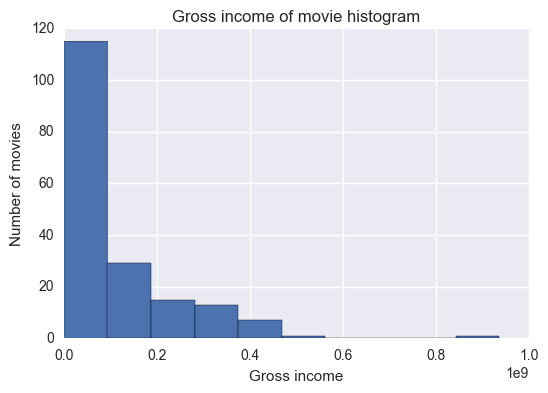

In [229]:
moviesdf["Gross"].hist()
plt.title("Gross income of movie histogram")
plt.xlabel("Gross income")
plt.ylabel("Number of movies")
plt.show()

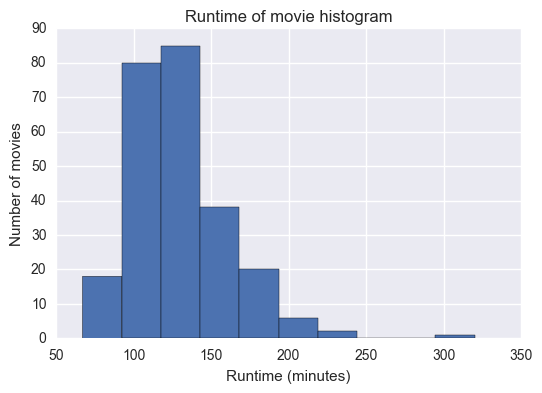

In [117]:
moviesdf["Runtime"].hist()
plt.title("Runtime of movie histogram")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of movies")
plt.show()

## Model: Define training set

In [133]:
df = pd.concat([moviesdf, genredf, actorsdf, 
                directorsdf, languagesdf, countriesdf], axis = 1)
df.shape

(250, 1118)

In [134]:
df = df.dropna(axis=0)

In [135]:
X = df.drop(["Gross", "Actors", "Awards", "Country", "Director",
             "Genre", "Language", "Metascore", "Plot", "Poster",
             "Rated", "Released", "Response", "Title", "Type", 
             "Writer", "imdbID", "CountryNoSpaces"], axis=1)
print(X.shape)
y = df["Gross"]
print(y.shape)

(143, 1100)
(143,)


## Model: Fit and evaluate model

(Tree-based models: use any combination of ensemble techniques: random forests, bagging, boosting)

In [198]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [219]:
def explore_regressor(regressor):
    all_scores = []
    best_score = -1
    best_depth = 0
    for i in range(1, 9):
        reg = regressor(max_depth=i, random_state=1)
        scores = cross_val_score(reg, X, y, cv=3, scoring='neg_mean_squared_error')
        current_score = np.mean(np.sqrt(-scores))
        # If the score mean is better than the current best, 
        # or best is the default (-1), then update!
        if current_score < best_score or best_score == -1:
            best_score = current_score
            best_depth = i
        # store to plot anyway!
        all_scores.append(current_score)

    print(regressor)
    print("Best score: %s" % best_score)
    print("Best depth: %s" % best_depth)

    best_model = regressor(max_depth=best_depth, random_state=1)
    best_model.fit(X, y)
    for (f,i) in zip(X.columns, best_model.feature_importances_):
        if i >= 0.01:
            print(f, "-", i)
        
    plt.figure()
    plt.plot(range(1, 9), all_scores)
    plt.xlabel('x=max tree depth')

<class 'sklearn.tree.tree.DecisionTreeRegressor'>
Best score: 105492575.685
Best depth: 6
Year - 0.0392425871189
imdbVotes - 0.322944259087
genre_action - 0.0130946420214
genre_adventure - 0.227284352337
genre_fantasy - 0.0152824995238
actor: scott glenn - 0.011387398911
director: dean deblois - 0.0106980496761
director: j.j. abrams - 0.154496186582
director: m. night - 0.0152269050678
director: robert zemeckis - 0.020286747784
director: steven spielberg - 0.0318696111555
language_arabic - 0.0447140018717
language_mandarin - 0.0672345553526
country_usa - 0.01468698474


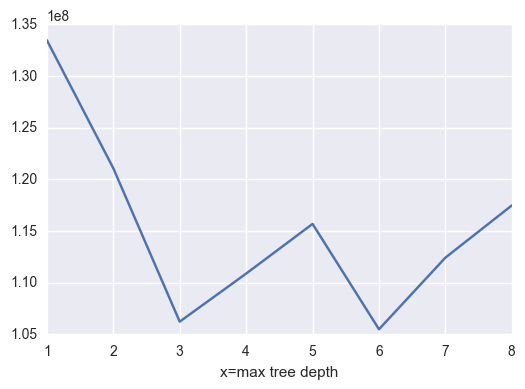

In [220]:
explore_regressor(DecisionTreeRegressor)

In [221]:
# now actually fit the model with the best depth
treereg = DecisionTreeRegressor(max_depth=6, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [222]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

#dot_data = StringIO()  
#export_graphviz(treereg, out_file=dot_data,  
#                feature_names=X.columns,  
#                filled=True, rounded=True,  
#                special_characters=True)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())  

In [223]:
from os import system
def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(treereg, out_file=dotfile, feature_names=X.columns,
                    filled=True, rounded=True, special_characters=True)
    dotfile.close()
    system("dot -Tpng tree.dot -o {0}".format(filename)) 

In [224]:
build_tree_image(treereg,'tree_bc.png')

#### Resulting tree included tree here

(I'm sorry that it's unreadable, but the best depth is 6 and there are so many features...  The png file is included in this folder and can be zoomed in/out.)

<img src='tree_bc.png' width= 100%>

<class 'sklearn.ensemble.forest.RandomForestRegressor'>
Best score: 100000888.739
Best depth: 6
Runtime - 0.0145653024157
Year - 0.04314261383
imdbVotes - 0.272152254224
genre_adventure - 0.206682429044
genre_animation - 0.0217140548644
genre_fantasy - 0.0111022758759
actor: adam driver - 0.100050692829
actor: christian bale - 0.0357910057887
actor: ginnifer goodwin - 0.010483958114
actor: heath ledger - 0.0125517934057
actor: joseph gordon - 0.0354097306893
actor: tom hanks - 0.0112798073866
director: j.j. abrams - 0.0550958158396
director: steven spielberg - 0.0173243441704
language_mandarin - 0.0115575167865
country_usa - 0.0175235078021


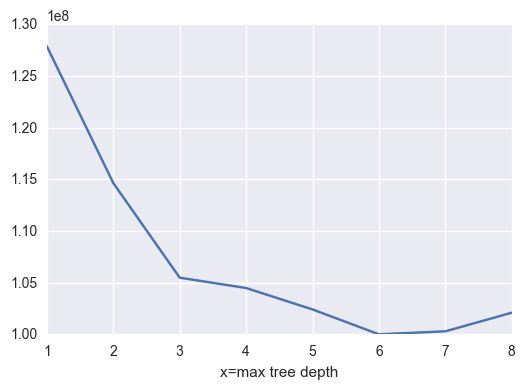

In [225]:
explore_regressor(RandomForestRegressor)

<class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
Best score: 103925088.036
Best depth: 8
Year - 0.0111675322013
imdbVotes - 0.0233407325252
genre_adventure - 0.195852174364
genre_animation - 0.0340452915704
genre_biography - 0.0321534281905
genre_family - 0.0208470108374
genre_fantasy - 0.0185355519962
genre_sci - 0.0119275032254
actor: adam driver - 0.104425892935
actor: christian bale - 0.0882112232263
actor: matt damon - 0.0108494814205
actor: piper perabo - 0.0150828729378
actor: tom hanks - 0.0346720961662
director: j.j. abrams - 0.156894419145
director: steven spielberg - 0.0107622050356
country_usa - 0.123115881478


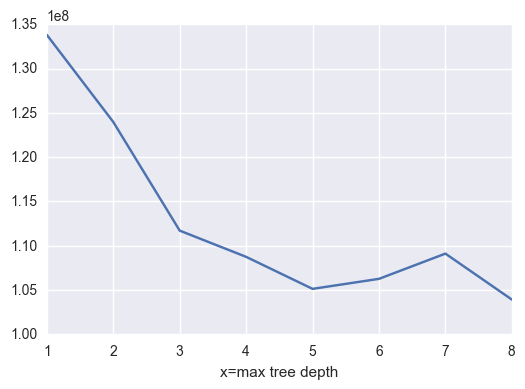

In [226]:
explore_regressor(ExtraTreesRegressor)

## Present: Describe findings in blog post: summary, model, recommendations

Create a blog post presenting the results of your findings as a report to Netflix, including: a problem statement,
summary statistics of the various factors (e.g. year, number of ratings, etc.), your model,
at least 2 graphics,
and your recommendations for next steps!


## Summary

Of the 250 most popular movies, I was able to find gross values for 143.  This is a rather small set of samples, so I tried to improve the dataset by augmenting the number of features.  I created boolean variables for actors, directors, languages, countries, and genres, and I hoped that I would get good results by using different regressors with all these features.  The problem is that the trees that give best results tend to be deep and they become harder to understand.

From the results that I obtained, I can conclude that the number of votes that a movie has is a good predictor of how much it will gross.  Also, directors J.J. Abrams and Steven Spielberg seem as good bets for blockbusters.
The most popular genres are adventure, animation, and fantasy.

A possible way to improve predictive results would be to consider the number of oscars wins/nominations of each movie.  This could have been retrieved from the present data, if I had the time to do that.


## Blog post summary

Blog post here:

https://acardocacho.github.io/project06/